In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import operator

from nltk.corpus import stopwords
stop = stopwords.words('english')
import string
from string import digits
punctuation = string.punctuation

from pandasql import sqldf

import datetime

%matplotlib inline
import matplotlib.pyplot as plt

#set you style if you want
plt.style.use("ggplot")

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:** The number of unique listings is 45053, and the number of unique hosts is 26286.


In [1]:
df_list=pd.read_csv('listings.csv')
df_review=pd.read_csv('reviews.csv')
df_cal=pd.read_csv('calendar.csv')
unique_id=df_list.id.nunique()
unique_host=df_list.host_id.nunique()
unique_id,unique_host

/Users/sherryguo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45053, 26286)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:** the mean is 11.932, median is 1.000, standard deviation is 242.144, minimum is 1.000 and maximum is 29584.000. 


In [2]:
df_2=df_list.groupby(by=['host_id'])['calculated_host_listings_count'].sum()
df_2a=df_2.agg([np.mean,np.median,np.std, np.min, np.max])
df_2a

mean         11.932397
median        1.000000
std         242.143721
amin          1.000000
amax      29584.000000
Name: calculated_host_listings_count, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:** For super host, the average number of listings is 7.359 with a standard deviation of 20.867. For non-super host, the average number of listings is 6.795 with a standard deviation of 14.348.


In [3]:
# You need to provide the code to answer the previous quesiton
df_3=df_list.groupby(by=['host_is_superhost'])['calculated_host_listings_count'].agg([np.mean,np.std])
df_3.reset_index(inplace=True)
df_3

,host_is_superhost,mean,std
0,f,6.795214,14.348464
1,t,7.359444,20.866644


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:** There are 22 unique types of host verification in LA database.


In [4]:
d={}
count=0
for i in range(len(df_list)):
    a=df_list["host_verifications"][i].strip("[").strip("]").replace(' ', '').split(",")
    for j in range(len(a)):
        if a[j] in d:
            d[a[j]]+=1
        else:
            d[a[j]]=1
    count+=len(a)

len(d)
d

{"'email'": 42359,
 "'phone'": 44881,
 "'facebook'": 8430,
 "'reviews'": 32907,
 "'kba'": 10762,
 "'jumio'": 20670,
 "'government_id'": 28789,
 "'offline_government_id'": 20906,
 "'selfie'": 13362,
 "'identity_manual'": 12284,
 "'work_email'": 6296,
 "'manual_online'": 307,
 "'manual_offline'": 611,
 "'google'": 3416,
 '': 7,
 "'sent_id'": 144,
 'None': 16,
 "'sesame'": 42,
 "'sesame_offline'": 42,
 "'photographer'": 3,
 "'zhima_selfie'": 181,
 "'weibo'": 78}

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**
the five most popular verification types are phone with 18.21%, email with 17.18%, reviews with 13.35%, government_id with 11.68%, offline_government_id with 8.48%.

In [5]:
for name in d.keys():
    precent=d[name]/count
    d[name]=round(precent,4)

sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[("'phone'", 0.1821),
 ("'email'", 0.1718),
 ("'reviews'", 0.1335),
 ("'government_id'", 0.1168),
 ("'offline_government_id'", 0.0848),
 ("'jumio'", 0.0839),
 ("'selfie'", 0.0542),
 ("'identity_manual'", 0.0498),
 ("'kba'", 0.0437),
 ("'facebook'", 0.0342),
 ("'work_email'", 0.0255),
 ("'google'", 0.0139),
 ("'manual_offline'", 0.0025),
 ("'manual_online'", 0.0012),
 ("'zhima_selfie'", 0.0007),
 ("'sent_id'", 0.0006),
 ("'weibo'", 0.0003),
 ("'sesame'", 0.0002),
 ("'sesame_offline'", 0.0002),
 ('None', 0.0001),
 ('', 0.0),
 ("'photographer'", 0.0)]

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**
the mean, standard deviation of the average price of a listing in Los Angels are 254.7782 and 684.7550.


In [6]:
df_6a=df_cal.loc[(df_cal.date>='2020-01-01') & (df_cal.date<='2020-03-01') &\
                 (df_cal.available=='t'), :]


def getmoney(price):
    str_pri=str(price)
    str_price=str_pri.replace(",","").strip('$')
    num_price=float(str_price)
    return num_price


df_6a['price']=df_6a.price.apply(getmoney)
df_6=df_6a.groupby(by=['listing_id'])['price'].mean().agg([np.mean,np.std])
round(df_6,4)

/Users/sherryguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


mean    254.7782
std     684.7550
Name: price, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

The top ten words in Jan 2016 is 'great': 5115, 'stay': 4447, 'place': 4097, 'clean': 2613, 'location': 2576, 'house': 2526, 'us': 2521, 'nice': 2318, 'would': 2264, 'host': 2230.

The top ten words in Mar 2017 is 'great': 11709, 'place': 11118, 'stay': 9112, 'location': 5642, 'clean': 5237, 'nice': 4368, 'would': 4355, 'host': 4242, 'house': 3622, 'comfortable': 3614.

The top ten words in Apr 2018 is 'great': 18787, 'place': 18654, 'stay': 14741, 'location': 9983, 'clean': 9031, 'would': 7263, 'nice': 6797, 'host': 6789, 'house': 5516, 'la': 5491.

Assumption: only consider the english comments.

In [7]:
def gettopword(date, df_review):
    df_7a=df_review.loc[(df_review.date>=date[0]) & (df_review.date<=date[1]), :'comments']

    for index, row in df_7a.iterrows():
        l=row['comments']
        if type(l) is str:
            l=l.lower()
            list1 = "".join(c for c in l if (c not in string.punctuation and not c.isdigit()))        
            df_7a.loc[index,'comments']=list1
        else:
            df_7a.drop(index, axis=0, inplace=True)
    df_7s=df_7a['comments'].apply(lambda x: [item for item in x.split(' ') if (item not in stop)])

    wordcount={}
    for row in df_7s:
        for word in row:
            try:
                wordcount[word]+=1
            except:
                wordcount[word]=1

    wordcount_s=dict(sorted(wordcount.items(), key=operator.itemgetter(1), reverse=True)[1:11])
    return wordcount_s

In [8]:
wordcount1=gettopword(['2016-01-01','2016-01-31'], df_review)
wordcount1

{'great': 5374,
 'stay': 4661,
 'place': 4284,
 'clean': 2719,
 'location': 2694,
 'house': 2642,
 'us': 2631,
 'nice': 2404,
 'would': 2382,
 'host': 2325}

In [9]:
wordcount2=gettopword(['2017-03-01','2017-03-31'], df_review)
wordcount2

{'great': 12169,
 'place': 11528,
 'stay': 9453,
 'location': 5860,
 'clean': 5444,
 'nice': 4540,
 'would': 4514,
 'host': 4422,
 'house': 3769,
 'comfortable': 3756}

In [10]:
wordcount3=gettopword(['2018-04-01','2018-04-31'], df_review)
wordcount3

{'great': 18787,
 'place': 18654,
 'stay': 14741,
 'location': 9983,
 'clean': 9031,
 'would': 7263,
 'nice': 6797,
 'host': 6789,
 'house': 5516,
 'la': 5491}

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**
the five zipcode is 90210, 90077, 93063, 90265, 90069, with the highest average listing price of 1963.557367, 1909.066130, 1567.562500, 1559.605010, 998.113153 respectively. The number of active listings are 278, 74, 2, 329, 423 and the number of hosts are 173, 48, 1, 221, 305.

In [11]:
df_8a=df_cal.loc[(df_cal.date>='2020-01-01') & (df_cal.date<='2020-02-01') &\
                 (df_cal.available=='t'), :]
df_8a["price2"]=df_8a.price.apply(getmoney)
df_8b=df_8a.merge(df_list,how = "left", left_on = "listing_id", right_on="id").\
                  loc[:,["listing_id","price2","zipcode","host_id"]]
df_8c=df_8b.groupby(by=['zipcode']).filter(lambda x:x['listing_id'].count()>=30)
df_8d=sqldf('SELECT zipcode, AVG(price2) AS avg_price2, COUNT(DISTINCT listing_id) AS listing_id_count, \
             COUNT(DISTINCT host_id) AS host_id_count FROM df_8c GROUP BY zipcode ORDER BY avg_price2 DESC\
             LIMIT 5')
df_8d.head()

/Users/sherryguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,zipcode,avg_price2,listing_id_count,host_id_count
0,90210,1963.557367,278,173
1,90077,1909.066130,74,48
2,93063,1567.562500,2,1
3,90265,1559.605010,329,221
4,90069,998.113153,423,305


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**
the five zipcodes are 91001, 91105, 93063, 90210, 90305.

In [12]:
def dow(date):
    year, month, day = (int(x) for x in date.split('-'))  
    ans = datetime.date(year, month, day)
    return ans.strftime("%A")

df_9a=df_cal.loc[(df_cal.date>='2020-01-01') & (df_cal.date<='2020-04-01') &\
                 (df_cal.available=='t'), :]
df_9a["dayofweek"] = df_9a.date.apply(dow)
df_9a["weekday"] = df_9a["dayofweek"].apply(lambda x:"Weekend"if x[0]== "S" else ("Weekday"))
df_9a["price2"]=df_9a.price.apply(getmoney)
df_9b=df_9a.merge(df_list,how = "left", left_on = "listing_id", right_on="id")\
                  .loc[:,["date","dayofweek","weekday","listing_id","price2","zipcode","host_id"]]
df_9c=df_9b.groupby(by=['zipcode']).filter(lambda x:x['listing_id'].count()>=30)
df_9d=sqldf("SELECT * FROM df_9c WHERE weekday='Weekday' GROUP BY zipcode")
df_9d=df_9d.groupby(by=["zipcode"])['price2'].agg({"price2":np.mean}).sort_values(by=["price2"],ascending=False)
df_9e=sqldf("SELECT * FROM df_9c WHERE weekday='Weekend' GROUP BY zipcode")
df_9e=df_9e.groupby(by=["zipcode"])['price2'].agg({"price2":np.mean}).sort_values(by=["price2"],ascending=False)
df_9f=df_9d.merge(df_9e,how = "outer", left_on = "zipcode", right_on="zipcode")
df_9f["max_abs_dif"]=df_9f["price2_x"]-df_9f["price2_y"]
df_9f.sort_values(by=["max_abs_dif"],ascending=False).head()

/Users/sherryguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherryguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sherryguo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,price2_x,price2_y,max_abs_dif
zipcode,,,
91001,487.0,187.0,300.0
91105,365.0,125.0,240.0
93063,3700.0,3509.0,191.0
90210,1735.0,1567.0,168.0
90305,209.0,75.0,134.0


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**
the average and standard deviation of the daily total capacity is 47091.648, 4921.138, while the average and standard deviation of the daily price per bed is 124.060, 5.634.
Assumption: our data included 2020-01-01 while not included 2020-04-01. 
Beacuse we are trying to calculate the average and standard deviation of the daily total capacity, it is meaningless to include Na. So we choose inner join rather than outter join. 


In [13]:
ava_df_cal=df_cal.loc[(df_cal.date>="2020-01-01") & (df_cal.date<"2020-04-01")&\
            (df_cal.available=='t'), ["listing_id", "date", "price"]]
df_10a=df_list[['id','beds']].merge(ava_df_cal, how='inner', left_on='id', right_on='listing_id')

def getmoney(price):
    str_pri=str(price)
    str_price=str_pri.replace(",","").strip('$')
    num_price=float(str_price)
    return num_price

df_10a['price']=df_10a.price.apply(getmoney)

In [14]:
df_10b=df_10a.groupby(by='date').agg({'beds':np.sum, 'price': np.sum})
df_10b.reset_index(inplace=True)
df_10b.beds.mean(),df_10b.beds.std()

(47091.64835164835, 4921.138764720635)

In [15]:
df_10b['price_pre_bed']=df_10b.apply(lambda x: x['price']/x['beds'], axis=1)
df_10b.price_pre_bed.mean(), df_10b.price_pre_bed.std()

(124.06037237364912, 5.6335888355340975)

### Question 11: What is the daily occupancy at Airbnb Los Angeles from 2019-09-01 to 2020-09-01? The daily occupancy is the percentage of listings which are not available in that day. What is the trend of daily occupancy in one year?

In [16]:
# Your code to answer Question 1
#create a new database with target date and convert available data into numerical data
df_cal1=df_cal.loc[(df_cal.date>="2019-09-01") & (df_cal.date<="2020-09-01"), \
                   ["listing_id", "date", "available","price"]]

df_cal1['available_num']=df_cal1.available.apply(lambda x: 1 if x=='t' else 0)

In [17]:
#calculate occupancy
from pandasql import sqldf
df_q1a=sqldf("SELECT date, COUNT(listing_id) AS total_list, SUM(available_num) AS total_available FROM df_cal1 GROUP BY date")
df_q1a["Occupancy"]=df_q1a['total_available']/df_q1a["total_list"]
df_q1a.head()

,date,total_list,total_available,Occupancy
0,2019-09-14,45053,5516,0.122434
1,2019-09-15,45053,11558,0.256542
2,2019-09-16,45053,14748,0.327348
3,2019-09-17,45053,15816,0.351053
4,2019-09-18,45053,15935,0.353695


[Text(0, 0.5, 'Occupancy each day'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Trend of Occupancy')]

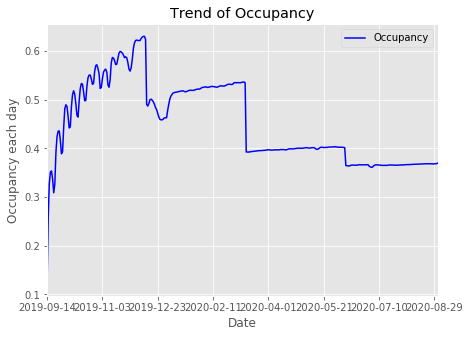

In [18]:
#plot result
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig, ax0=plt.subplots(nrows=1,ncols=1, figsize = (7,5))

df_q1a.plot(kind="line", x = "date", y = "Occupancy", color = 'b', label = "Occupancy",  ax = ax0 )
ax0.set(title = "Trend of Occupancy", xlabel="Date", ylabel="Occupancy each day")

### Question 12: What is daily average price at Airbnb Los Angeles from 2019-09-01 to 2020-09-01? What is the trend of daily average price in one year? Is there any relationship between daily occupancy, average price and total number of listings?

In [19]:
#normalize price data
def getmoney(price):
    str_pri=str(price)
    str_price=str_pri.replace(",","").strip('$')
    num_price=float(str_price)
    return num_price

df_cal1['price']=df_cal1.price.apply(getmoney)
df_cal1.groupby(by='date').fillna({'price':df_cal1.price.mean()},inplace=True)


""


In [20]:
#calculate daily price
df_q2a=sqldf("SELECT date, AVG(price) AS avg_price FROM df_cal1 GROUP BY date")
df_q2a.head()

,date,avg_price
0,2019-09-14,213.572475
1,2019-09-15,204.912608
2,2019-09-16,203.401287
3,2019-09-17,203.450877
4,2019-09-18,204.096426


[Text(0, 0.5, 'Average price each day'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Trend of Price')]

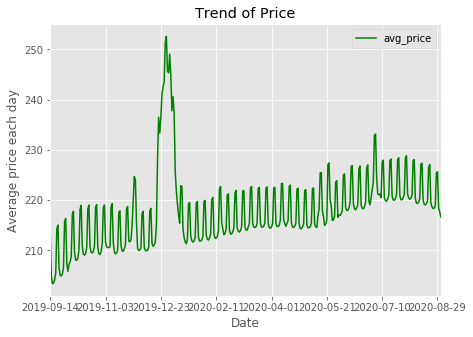

In [21]:
#plot the result
fig2, ax1=plt.subplots(nrows=1,ncols=1, figsize = (7,5))
df_q2a.plot(kind="line", x = "date", y = "avg_price", color = 'g', label = "avg_price",  ax = ax1 )
ax1.set(title = "Trend of Price", xlabel="Date", ylabel="Average price each day")

### Question 13: What are the duration and average price per night of each listing at Airbnb Los Angeles from 2019-09-01 to 2020-09-01? The duration is the number of nights booked per year of a listing. In other words, does the number of nights booked per year make it impossible for a listing to be used for residentail housing? What about the duration and average price of each neighborhood in Los Angeles? Is there any relationship between the duration and average price per night for a neighborhood?

In [22]:
# Your code to answer Question 3

import numpy as np
df_q3a=df_cal.loc[(df_cal.date>="2019-09-01") & (df_cal.date<="2020-09-01")&\
            (df_cal.available=='t'), ["listing_id", "available","price"]]

df_q3a['price']=df_q3a.price.apply(getmoney)
df_q3b=sqldf("SELECT listing_id, COUNT(available) AS Duration, AVG(price) AS Avg_Price\
              FROM df_q3a GROUP BY listing_id")
df_q3b.head()

,listing_id,Duration,Avg_Price
0,109,154,122.000000
1,344,80,156.250000
2,2708,265,51.958491
3,2732,335,140.000000
4,5728,95,69.631579


In [23]:
df_q3c=df_q3b.merge(df_list[['id','neighbourhood']], how='left', left_on='listing_id', right_on='id')
df_q3d=sqldf("SELECT neighbourhood, AVG(Duration) AS avg_Duration, AVG(Avg_Price) AS Avg_Price_N\
              FROM df_q3c GROUP BY neighbourhood ORDER BY AVG(Duration) DESC")
df_q3e=sqldf("SELECT neighbourhood, COUNT(DISTINCT id) AS total_list, AVG(Avg_Price) AS Avg_Price_N\
              FROM df_q3c GROUP BY neighbourhood ORDER BY total_list DESC")

[Text(0, 0.5, 'Average Price'),
 Text(0.5, 0, 'Average Duration'),
 Text(0.5, 1.0, 'Listing Characters in Neighborhood')]

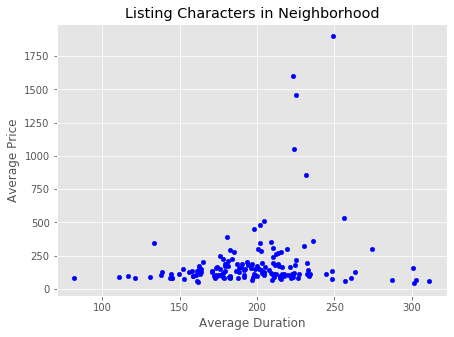

In [24]:
# plot the result
fig3, ax3_0=plt.subplots(nrows=1,ncols=1, figsize = (7,5))

df_q3d.plot(kind="scatter", x = "avg_Duration", y = "Avg_Price_N", color = 'b',  ax = ax3_0 )
ax3_0.set(title = "Listing Characters in Neighborhood", xlabel="Average Duration", ylabel="Average Price")

[Text(20.200000000000003, 0.5, 'Average Price'),
 Text(0.5, 20.200000000000003, 'Total List'),
 Text(0.5, 1, 'Listing Characters in Neighborhood')]

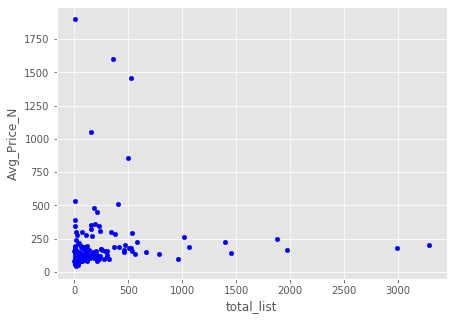

In [25]:
# plot the result
fig3, ax3_1=plt.subplots(nrows=1,ncols=1, figsize = (7,5))

df_q3e.plot(kind="scatter", x = "total_list", y = "Avg_Price_N", color = 'b',  ax = ax3_1 )
ax3_0.set(title = "Listing Characters in Neighborhood", xlabel="Total List", ylabel="Average Price")

[Text(0, 0.5, 'Total List'),
 Text(0.5, 0, 'Average Duration'),
 Text(0.5, 1.0, 'Listing Characters in Neighborhood')]

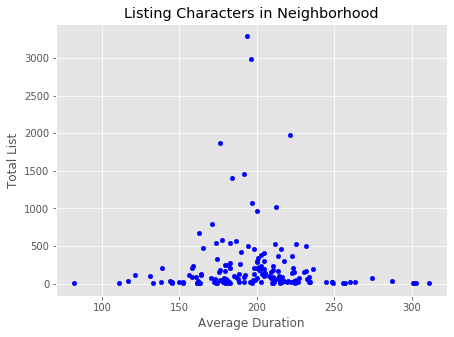

In [26]:
# plot the result
df_q3f=df_q3d.merge(df_q3e, how='inner', left_on='neighbourhood', right_on='neighbourhood')
fig3, ax3_2=plt.subplots(nrows=1,ncols=1, figsize = (7,5))

df_q3f.plot(kind="scatter", x = "avg_Duration", y = "total_list", color = 'b',  ax = ax3_2 )
ax3_2.set(title = "Listing Characters in Neighborhood", xlabel="Average Duration", ylabel="Total List")

### Question 14: Which five hosts has the highest score on purely positive words feedback from comments? 
Using the outside source from [Inquirer Basic Database](www.wjh.harvard.edu/~inquirer/inquirerbasic.xls) to analyze the positive and negative words from comments.

Assumption: purely positive for each host are equal to total positive words minus total negative words for each host

In [27]:
# Your code to answer Question 4
# convert the database into a dictionary that include positive and negative words
dics = pd.read_excel('http://www.wjh.harvard.edu/~inquirer/inquirerbasic.xls',
                     dtype={'Entry':'str'})

df_q4a = dics[['Entry', 'Positiv', 'Negativ']].dropna(subset=['Positiv', 'Negativ'], how='all')
df_q4a['tag'] = 1
df_q4a.loc[(df_q4a['Negativ']=='Negativ'), 'tag'] = -1
df_q4a.drop(['Positiv', 'Negativ'], axis=1, inplace=True)
df_q4a[df_q4a['Entry'].str.contains(r'#')]
df_q4a['Entry'] = df_q4a['Entry'].str.replace(r'#\d+', '')
df_q4a = df_q4a.drop_duplicates()
cnts = df_q4a['Entry'].value_counts()
df_q4a[df_q4a['Entry'].isin(cnts[cnts==1].index)]
df_q4a['Entry'] = df_q4a['Entry'].str.lower()
df_q4a = df_q4a.set_index('Entry').squeeze()
df_q4a = df_q4a.to_dict()

In [28]:
# create a clean comment list
def clean_comment(row):
    import string
    list2=[]
    l=row['comments']
    if type(l) is str:
        l=l.lower()
        list2 = "".join(c for c in l if (c not in string.punctuation and not c.isdigit()))        
    return list2

# count positive and negative words for each comment
def score(s, dic=df_q4a):
    negcnt, poscnt = 0, 0
    words = s['new_review'].split()
    for w in words:
        if dic.get(w,0) == 1:
            poscnt += 1
        elif dic.get(w,0) == -1:
            negcnt += 1
    return poscnt, negcnt, len(words)

In [29]:
# using the purely positive score and rank the top 5 host
df_q4c=df_review.loc[:,["listing_id"]]
df_q4c["new_review"]=df_review.apply(clean_comment,axis=1)
df_q4d = df_q4c[df_q4c['new_review'].map(lambda x: len(x)) > 0]
df_q4d = df_q4d.apply(score,axis=1)
df_q4c['positive']=df_q4d.apply(lambda x: x[0])
df_q4c['negative']=df_q4d.apply(lambda x: x[1])
df_q4c['score']=df_q4c['positive']-df_q4c['negative']
df_q4d=df_q4c.groupby(by=['listing_id'])['score'].agg([np.sum])
df_q4e=df_q4d.sort_values(by=["sum"],ascending=False)
df_q4e=df_q4e.reset_index()
df_q4f=df_q4e.head(5)

(3000, 4500)

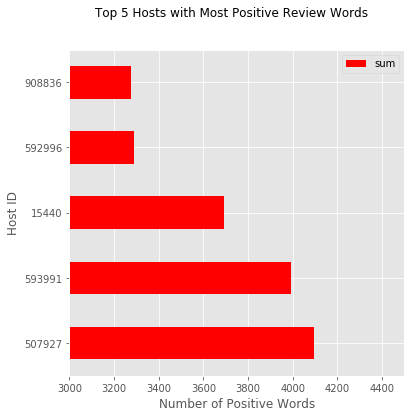

In [30]:
# develop a graph to illustrate the top 5 host ID with the most purely positive words
fig,ax0 = plt.subplots(figsize=(6,6))
fig.suptitle("Top 5 Hosts with Most Positive Review Words")

df_q4f.plot(kind="barh",x="listing_id",y="sum",color="r",ax=ax0) 
ax0.set(xlabel = "Number of Positive Words",ylabel="Host ID")
ax0.set_xlim([3000,4500])

### Question 15: What is the correlation between purely positive words in comments with the review scores value on the database? In other words, is there any relationship between the words in comments and the review scores they received? Could positive words be an reason to explain the review scores value?

In [31]:
df_q5a=df_list.merge(df_q4e,how = "left", left_on = "id", right_on="listing_id").\
                     loc[:,['listing_id','review_scores_rating','review_scores_value','neighbourhood','sum']]
df_q5b=df_q5a.groupby(by='neighbourhood')['review_scores_rating'].agg([np.mean])
df_q5c=df_q5a.groupby(by='neighbourhood')['sum'].agg([np.mean])
df_q5d=df_q5b.sort_values(by=["mean"],ascending=False)
df_q5e=df_q5c.sort_values(by=["mean"],ascending=False)
df_q5f=df_q5d.reset_index()
df_q5f["Rank1"] = df_q5f["mean"].rank(ascending = 0) 
df_q5g=df_q5e.reset_index()
df_q5g["Rank2"] = df_q5g["mean"].rank(ascending = 0) 
df_q5h=df_q5f.merge(df_q5g,how = "inner", left_on = "neighbourhood", right_on="neighbourhood")
df_q5h.head()

,neighbourhood,mean_x,Rank1,mean_y,Rank2
0,Vernon,100.00,2.0,7.250000,162.0
1,Bradbury,100.00,2.0,13.000000,161.0
2,Bell Gardens,100.00,2.0,13.333333,160.0
3,Irwindale,99.60,4.0,157.400000,47.0
4,La Crescenta-Montrose,98.25,5.0,108.000000,104.0


In [32]:
df_q5h[['Rank1','Rank2']].corr()

,Rank1,Rank2
Rank1,1.000000,0.193793
Rank2,0.193793,1.000000


[Text(0, 0.5, 'Ranking'),
 Text(0.5, 0, 'Neighbourhood'),
 Text(0.5, 1.0, 'Positive Ranking by Neighbourhood')]

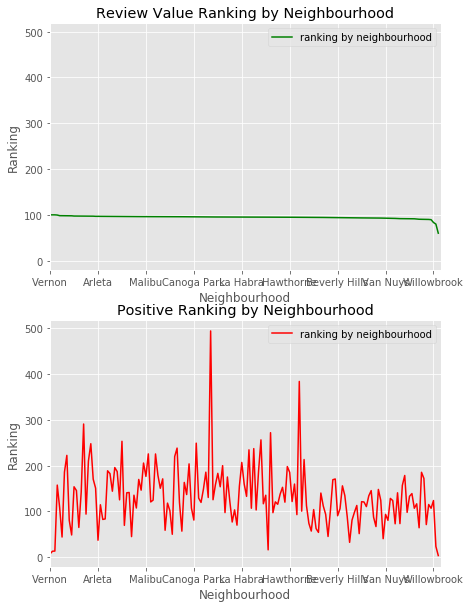

In [33]:
fig, (ax0,ax1)=plt.subplots(nrows=2,ncols=1, figsize = (7,10),sharey=True)
df_q5h.plot(kind="line", x = "neighbourhood", y = "mean_x", color = 'g', label = "ranking by neighbourhood", ax = ax0)
ax0.set(title = "Review Value Ranking by Neighbourhood", xlabel="Neighbourhood", ylabel="Ranking")
df_q5h.plot(kind="line", x = "neighbourhood", y = "mean_y", color = 'r', label = "ranking by neighbourhood", ax = ax1 )
ax1.set(title = "Positive Ranking by Neighbourhood", xlabel="Neighbourhood", ylabel="Ranking")

## Executive Summary